MODEL TRAINING PROCESS

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam
from keras import models

In [25]:
batch_size = 32
img_height = 180
img_width = 180
train_data_dir = "frames_normal"
frames = "frames"

Using 80% of the images for training and 20% for validation.

In [27]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 23983 files belonging to 14 classes.


In [28]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  frames,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 152060 files belonging to 14 classes.


In [30]:
class_names = val_ds.class_names
print(class_names)

['Abuse', 'Arrest', 'Arson', 'Assault', 'Burglary', 'Explosion', 'Fighting', 'NormalVideos', 'RoadAccidents', 'Robbery', 'Shooting', 'Shoplifting', 'Stealing', 'Vandalism']


### load the model


In [32]:
num_classes = len(class_names)

model = models.load_model('crime-detection-model')


### Model summary

View all the layers of the network using the Keras `Model.summary` method:

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 14)                7182      
                                                                 
Total params: 24,643,982
Trainable params: 1,056,270
Non-trainable params: 23,587,712
_________________________________________________________________


### Compile the model


In [34]:

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

Train the model for 20 epochs with the Keras `Model.fit` method:

In [35]:
epochs=1
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

750/750 [==============================] - ETA: 0s - loss: 2.8656e-06 - accuracy: 1.0000

### Save the model

In [12]:
model.save("crime-detection-model_2")

INFO:tensorflow:Assets written to: crime-detection-model\assets


INFO:tensorflow:Assets written to: crime-detection-model\assets


## Visualize training results

Create plots of the loss and accuracy on the training and validation sets:

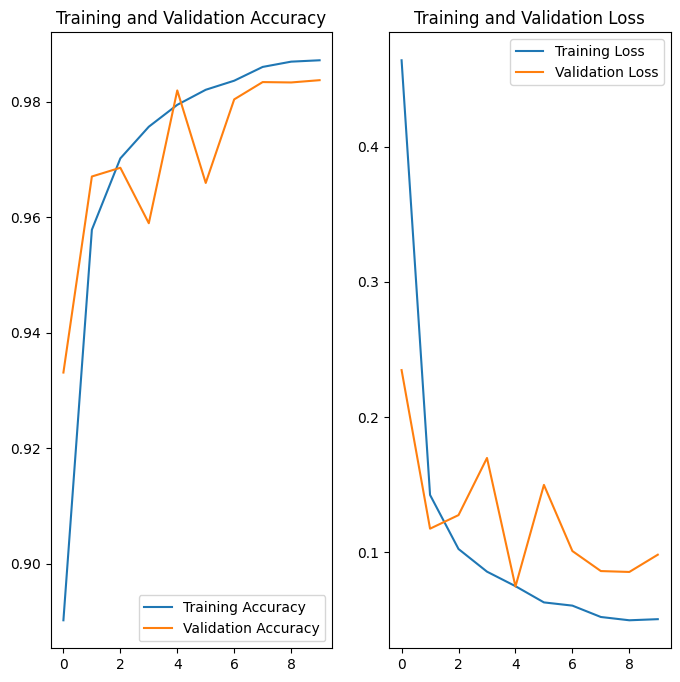

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()